In [1]:
import numpy as np
import cvxpy as cp
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Teoria Markowitza
Teoria Markowitza (portfelowa) - teoria podejmowania decyzji w warunkach ryzyka, oparta na technice dywersyfikacji. Została opublikowana przez Harry'ego Markowitza w 1952 roku. W myśl tej teorii osoba dokonująca inwestycji w aktywa powinna inwestować kapitał tak, aby albo minimalizować wariancję (podstawową miarę ryzyka) przy danej oczekiwanej stopie zwrotu, albo maksymalizować stopę zwrotu przy danej wariancji.


Teoria Markowitza, zwana również modelem średniej-wariancji (mean-variance model), opiera się na następujących założeniach:

1. Oczekiwany zwrot: Każde aktywo ma oczekiwany zwrot, który jest średnią historycznych zwrotów.
2. Ryzyko: Ryzyko mierzone jest jako wariancja lub odchylenie standardowe zwrotów.
3. Korelacja: Korelacje między zwrotami różnych aktywów są uwzględniane w celu dywersyfikacji ryzyka.

# Oczekiwany zwrot portfela

$\mu_p$ = $\sum_{i=1}^{n}(w_i * \mu_i)$, gdzie $\mu_p$ to oczekiwany zwrot portfela, $w_i$ to waga i-tego aktywa w portfelu, a $\mu_i$ to oczekiwany zwrot i-tego aktywa.
$\mu_p$ = $w^T * \mu$, gdzie $w$ to wektor wag aktywów w portfelu, a $\mu$ to wektor oczekiwanych zwrotów aktywów.

# Wariancja portfela

$\sigma_p^2$ = $\sum_{i=1}^{n}\sum_{j=1}^{n}(w_i * w_j * \sigma_{ij})$, gdzie $\sigma_p^2$ to wariancja portfela, $w_i$ i $w_j$ to wagi i-tego i j-tego aktywa w portfelu, a $\sigma_{ij}$ to kowariancja między zwrotami i-tego i j-tego aktywa.
$\sigma_p^2$ = $w^T * \Sigma * w$, gdzie $w$ to wektor wag aktywów w portfelu, a $\Sigma$ to macierz kowariancji między zwrotami aktywów.

Ograniczenia:
1. Wagi muszą sumować się do 1: $\sum_{i=1}^{n}w_i = 1$
2. Wagi muszą być nieujemne: $w_i >= 0$

In [46]:
# Przykład: Maksymalizacja oczekiwanego zwrotu przy zadanym maksymalnym poziomie ryzyka (wariancji)

expected_returns = np.array([0.10, 0.12, 0.14])
cov_matrix = np.array([
    [0.005, -0.010, 0.004],
    [-0.010, 0.025, -0.002],
    [0.004, -0.002, 0.023]
])

target_variance = 0.0025

n_assets = len(expected_returns)

weights = cp.Variable(n_assets)

constraints = [
    cp.sum(weights) == 1,
    weights >= 0,
    cp.quad_form(weights, cov_matrix) <= target_variance
]

objective = cp.Maximize(weights.T @ expected_returns)

problem = cp.Problem(objective, constraints)

problem.solve()

print("Status optymalizacji:", problem.status)
print("Oczekiwany zwrot portfela:", weights.value @ expected_returns)
print("Wariancja portfela:", weights.value.T @ cov_matrix @ weights.value)
print("Wagi aktywów w portfelu:", weights.value)

Status optymalizacji: optimal
Oczekiwany zwrot portfela: 0.11577736509379938
Wariancja portfela: 0.0024999980793462342
Wagi aktywów w portfelu: [0.44368067 0.32377041 0.23254892]


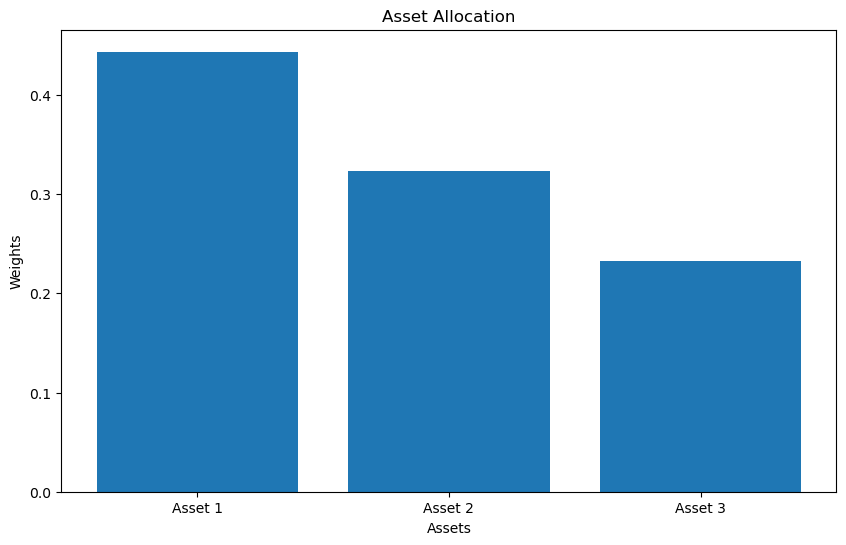

In [47]:
plt.figure(figsize=(10, 6))
plt.bar(range(n_assets), weights.value)
plt.xlabel('Assets')
plt.ylabel('Weights')
plt.title('Asset Allocation')
plt.xticks(range(n_assets), ['Asset 1', 'Asset 2', 'Asset 3'])
plt.show()

In [48]:
# Przykład: Minimalizacja ryzyka (wariancji) przy zadanym oczekiwanym zwrocie

target_return = 0.13

n_assets = len(expected_returns)

weights = cp.Variable(n_assets)

constraints = [
    cp.sum(weights) == 1,
    weights >= 0,
    weights.T @ expected_returns >= target_return
]

objective = cp.Minimize(cp.quad_form(weights, cov_matrix))

problem = cp.Problem(objective, constraints)

problem.solve()

print("Status optymalizacji:", problem.status)
print("Oczekiwany zwrot portfela:", weights.value @ expected_returns)
print("Wariancja portfela:", weights.value.T @ cov_matrix @ weights.value)
print("Wagi aktywów w portfelu:", [f"{weight:.6f}" for weight in weights.value])

Status optymalizacji: optimal
Oczekiwany zwrot portfela: 0.12999999999999998
Wariancja portfela: 0.00969429347826084
Wagi aktywów w portfelu: ['0.084239', '0.331522', '0.584239']


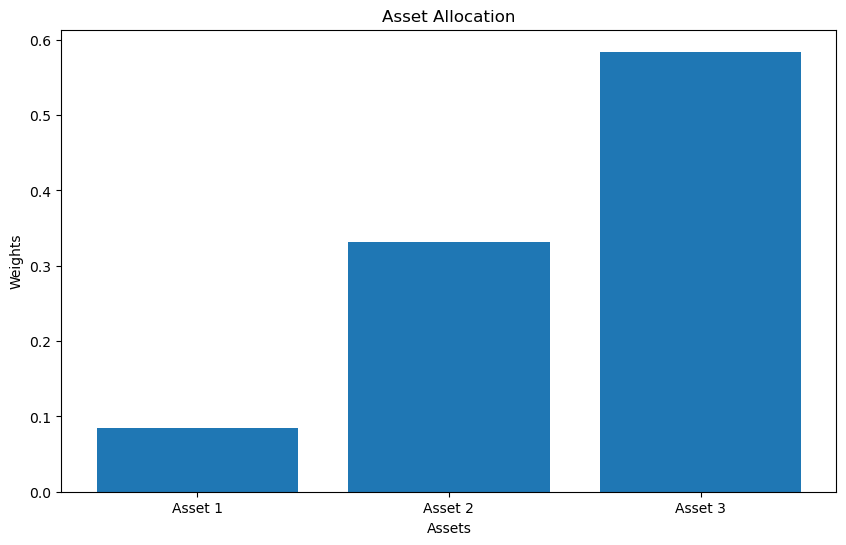

In [49]:
plt.figure(figsize=(10, 6))
plt.bar(range(n_assets), weights.value)
plt.xlabel('Assets')
plt.ylabel('Weights')
plt.title('Asset Allocation')
plt.xticks(range(n_assets), ['Asset 1', 'Asset 2', 'Asset 3'])
plt.show()

In [60]:
target_variances = np.linspace(0.001, 0.025, 100)
target_returns = []

for target_variance in target_variances:
    constraints = [
        cp.sum(weights) == 1,
        weights >= 0,
        cp.quad_form(weights, cov_matrix) <= target_variance
    ]

    objective = cp.Maximize(weights.T @ expected_returns)

    problem = cp.Problem(objective, constraints)

    problem.solve()

    target_returns.append(weights.value @ expected_returns)
    

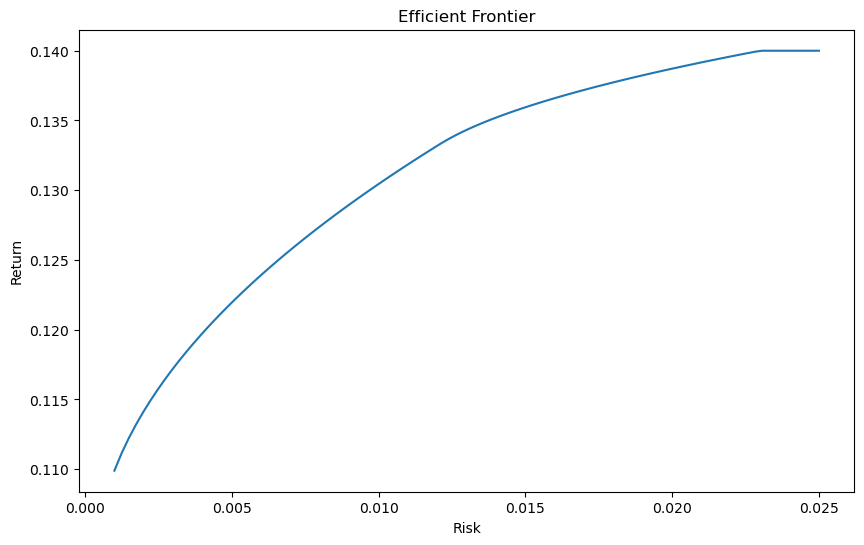

In [61]:
plt.figure(figsize=(10, 6))
plt.plot(target_variances, target_returns)
plt.xlabel('Risk')
plt.ylabel('Return')
plt.title('Efficient Frontier')
plt.show()